In [1]:
import torch
from env import CholeskyTaskGraph, Task
import networkx as nx
from torch_geometric.utils.convert import to_networkx
import torch.nn.functional as F
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import seaborn as sns
import time
sns.set()


In [2]:
# model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Apr13_14-24-24_nathan-Latitude-7490/model.pth')

# model = torch.load("/home/nathan/PycharmProjects/HPC/runs/Apr19_19-02-33_nathan-Latitude-7490/model.pth")
model = torch.load("/home/nathan/PycharmProjects/HPC/runs/Apr20_01-11-05_nathan-Latitude-7490/model.pth") #168
# model = torch.load("/home/nathan/PycharmProjects/HPC/runs/Apr20_05-18-01_chifflot-4.lille.grid5000.fr/model.pth")
# model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Apr25_20-07-37_nathan-Latitude-7490/model.pth')
# model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Apr20_05-12-44_chifflot-4.lille.grid5000.fr_162/model.pth')
# model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Jun26_00-59-47_nathan-Latitude-7490/model.pth') # n=4 (ttf)
# model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Jun26_01-02-31_nathan-Latitude-7490/model.pth') # n = 15


In [14]:
# ns = list(range(1, 15))
# ps = list(range(1, 10))
temp = 1
ns = [1, 2, 4, 6, 8, 10, 15, 20, 25]
# ns = [6]
p = 4
rewards = []
times = []
critical_path = []
total_work_normalized = []
temps_computation = []

for n in ns: 
    env = CholeskyTaskGraph(n, p, 1)
    print(env.is_homogene)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False
    start_time = time.time()
    while not done:
        policy, value = model(observation)
#         new_policy = policy ** temp / ((policy ** temp).sum())
#         action_raw = torch.multinomial(new_policy, 1).detach().cpu().numpy()[0]
        action_raw = policy.argmax().detach().cpu().numpy()
        ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
        # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
        action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
        observation, reward, done, info = env.step(action)
    print(reward)
    print(env.time)
    rewards.append(reward)
    times.append(env.time)
    critical_path.append(env.critic_path_duration)
    total_work_normalized.append(env.total_work_normalized)
    temps_computation.append(time.time()-start_time)
    print(env.critic_path_duration)

True
57
-0.0
116.0
116


In [9]:
# Compare with ASAP:

times_asap = []
nb_nodes = []
for n in ns:
    env = CholeskyTaskGraph(n, 4, 1)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False

    while not done:
        ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
        # policy, value = model(observation)
        policy = observation["graph"].x[ready_nodes][:, -1]
        # action_raw = torch.multinomial(policy, 1).detach().cpu().numpy()
        action_raw = policy.argmax().detach().cpu().numpy()
        # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
        action = observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
        observation, reward, done, info = env.step(action)
    times_asap.append(env.time)
    nb_nodes.append(len(env.task_data.x))
    print(reward)
    print(env.time)

2
-0.0
11.0
5
-0.0
32.0
21
-0.0
74.0
57
-0.11206896551724138
129.0
121
-0.0949367088607595
173.0
221
-0.24782608695652175
287.0
681
-0.07286821705426356
692.0
1541
-0.0296028880866426
1426.0
2926
-0.015823095823095823
2584.0


In [3]:
# ns = list(range(1, 15))
# ps = list(range(1, 10))
temp = 1
ns = [1, 2, 4, 6, 8, 10, 15, 20, 25]
ps = [2, 3, 4, 5, 6, 8, 10]
rewards = np.zeros((len(ns), len(ps)))
times = np.zeros((len(ns), len(ps)))
critical_path = np.zeros((len(ns), len(ps)))
total_work_normalized = np.zeros((len(ns), len(ps)))
temps_computation = np.zeros((len(ns), len(ps)))

for i, n in enumerate(ns):
    for j, p in enumerate(ps):
        env = CholeskyTaskGraph(n, p, 1)
        print(env.is_homogene)
        print(len(env.task_data.x))
        observation = env.reset()
        done = False
        start_time = time.time()
        while not done:
            policy, value = model(observation)
    #         new_policy = policy ** temp / ((policy ** temp).sum())
    #         action_raw = torch.multinomial(new_policy, 1).detach().cpu().numpy()[0]
            action_raw = policy.argmax().detach().cpu().numpy()
            ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
            # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
            action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
            observation, reward, done, info = env.step(action)
        print(reward)
        print(env.time)
        rewards[i, j] = reward
        times[i, j] = env.time
        critical_path[i, j] = env.critic_path_duration
        total_work_normalized[i, j] = env.total_work_normalized
        temps_computation[i, j] = time.time() - start_time
        print(env.critic_path_duration)

True
2
-0.0
11.0
11
True
2
-0.0
11.0
11
True
2
-0.0
11.0
11
True
2
-0.0
11.0
11
True
2
-0.0
11.0
11
True
2
-0.0
11.0
11
True
2
-0.0
11.0
11
True
5
-0.0
32.0
32
True
5
-0.0
32.0
32
True
5
-0.0
32.0
32
True
5
-0.0
32.0
32
True
5
-0.0
32.0
32
True
5
-0.0
32.0
32
True
5
-0.0
32.0
32
True
21


/home/nathan/PycharmProjects/HPC/model.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(probs)


-0.0
74.0
74
True
21
-0.0
74.0
74
True
21
-0.0
74.0
74
True
21
-0.0
74.0
74
True
21
-0.0
74.0
74
True
21
-0.0
74.0
74
True
21
-0.0
74.0
74
True
57
-0.16666666666666666
161.0
116
True
57
-0.034482758620689655
120.0
116
True
57
-0.02586206896551724
119.0
116
True
57
-0.02586206896551724
119.0
116
True
57
-0.02586206896551724
119.0
116
True
57
-0.02586206896551724
119.0
116
True
57
-0.017241379310344827
118.0
116
True
121
-0.08955223880597014
292.0
158
True
121
-0.1473880597014926
205.0
158
True
121
-0.06329113924050633
168.0
158
True
121
-0.06329113924050633
168.0
158
True
121
-0.06329113924050633
168.0
158
True
121
-0.056962025316455694
167.0
158
True
121
-0.0379746835443038
164.0
158
True
221
-0.043478260869565216
480.0
200
True
221
-0.08913043478260863
334.0
200
True
221
-0.15217391304347827
265.0
200
True
221
-0.12
224.0
200
True
221
-0.115
223.0
200
True
221
-0.12
224.0
200
True
221
-0.085
217.0
200
True
681
-0.01937984496124031
1315.0
305
True
681
-0.03837209302325582
893.0
305
Tru

In [22]:
# Compare with ASAP:

times_asap = np.zeros((len(ns), len(ps)))
nb_nodes = np.zeros((len(ns), len(ps)))
for i, n in enumerate(ns):
    for j, p in enumerate(ps):
        env = CholeskyTaskGraph(n, p, 1)
        print(len(env.task_data.x))
        observation = env.reset()
        done = False

        while not done:
            ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
            # policy, value = model(observation)
            policy = observation["graph"].x[ready_nodes][:, -1]
            # action_raw = torch.multinomial(policy, 1).detach().cpu().numpy()
            action_raw = policy.argmax().detach().cpu().numpy()
            # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
            action = observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
            observation, reward, done, info = env.step(action)
        times_asap[i, j] = env.time
        nb_nodes[i, j] = len(env.task_data.x)
        print(reward)
        print(env.time)

2
-0.0
11.0
2
-0.0
11.0
2
-0.0
11.0
2
-0.0
11.0
2
-0.0
11.0
2
-0.0
11.0
2
-0.0
11.0
5
-0.0
32.0
5
-0.0
32.0
5
-0.0
32.0
5
-0.0
32.0
5
-0.0
32.0
5
-0.0
32.0
5
-0.0
32.0
21
-0.0
74.0
21
-0.0
74.0
21
-0.0
74.0
21
-0.0
74.0
21
-0.0
74.0
21
-0.0
74.0
21
-0.0
74.0
57
-0.11594202898550725
154.0
57
-0.0
116.0
57
-0.0
116.0
57
-0.0
116.0
57
-0.0
116.0
57
-0.0
116.0
57
-0.0
116.0
121
-0.05223880597014925
282.0
121
-0.10820895522388066
198.0
121
-0.012658227848101266
160.0
121
-0.0
158.0
121
-0.0
158.0
121
-0.0
158.0
121
-0.0
158.0
221
-0.02608695652173913
472.0
221
-0.06630434782608689
327.0
221
-0.11304347826086956
256.0
221
-0.065
213.0
221
-0.0
200.0
221
-0.0
200.0
221
-0.0
200.0
681
-0.009302325581395349
1302.0
681
-0.023255813953488372
880.0
681
-0.03565891472868217
668.0
681
-0.05426356589147287
544.0
681
-0.07441860465116279
462.0
681
-0.11937984496124031
361.0
681
-0.0
305.0
1541
-0.004332129963898917
2782.0
1541
-0.011010830324909706
1867.0
1541
-0.01660649819494585
1408.0
1541
-0.02527

In [25]:
times_asap

array([[  11.,   11.,   11.,   11.,   11.,   11.,   11.],
       [  32.,   32.,   32.,   32.,   32.,   32.,   32.],
       [  74.,   74.,   74.,   74.,   74.,   74.,   74.],
       [ 154.,  116.,  116.,  116.,  116.,  116.,  116.],
       [ 282.,  198.,  160.,  158.,  158.,  158.,  158.],
       [ 472.,  327.,  256.,  213.,  200.,  200.,  200.],
       [1302.,  880.,  668.,  544.,  462.,  361.,  305.],
       [2782., 1867., 1408., 1136.,  954.,  729.,  597.],
       [5100., 3412., 2567., 2063., 1727., 1309., 1060.]])

In [5]:
times

array([[  11.,   11.,   11.,   11.,   11.,   11.,   11.],
       [  32.,   32.,   32.,   32.,   32.,   32.,   32.],
       [  74.,   74.,   74.,   74.,   74.,   74.,   74.],
       [ 161.,  120.,  119.,  119.,  119.,  119.,  118.],
       [ 292.,  205.,  168.,  168.,  168.,  167.,  164.],
       [ 480.,  334.,  265.,  224.,  223.,  224.,  217.],
       [1315.,  893.,  709.,  614.,  506.,  407.,  365.],
       [2802., 1900., 1437., 1209., 1042.,  808.,  664.],
       [5124., 3453., 2590., 2112., 1790., 1382., 1130.]])

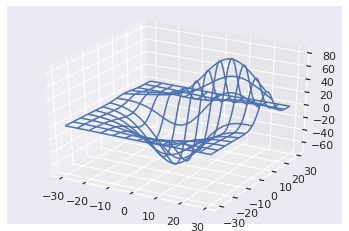

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

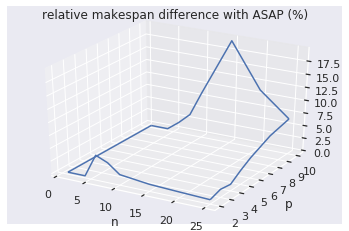

In [40]:
ns_plot = np.repeat(np.array(ns)[:, np.newaxis], len(ps), axis=1)
ps_plot = np.repeat(np.array(ps)[np.newaxis, :], len(ns), axis=0)
# print(ps_plot)
# print(ns_plot)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(ns_plot, ps_plot, (times - times_asap)/times_asap * 100, rstride=10, cstride=10)
# ax.plot_wireframe(ns_plot, ps_plot, times_asap, rstride=10, cstride=10)
plt.xlabel('n')
plt.ylabel('p')
plt.title('relative makespan difference with ASAP (%)')
plt.savefig('/home/nathan/Documents/p_n_makespan_n8_p4.pdf')
plt.show()


In [20]:

print(times)

[[  11.   11.   11.   11.   11.   11.   11.]
 [  32.   32.   32.   32.   32.   32.   32.]
 [  74.   74.   74.   74.   74.   74.   74.]
 [ 161.  120.  119.  119.  119.  119.  118.]
 [ 292.  205.  168.  168.  168.  167.  164.]
 [ 480.  334.  265.  224.  223.  224.  217.]
 [1315.  893.  709.  614.  506.  407.  365.]
 [2802. 1900. 1437. 1209. 1042.  808.  664.]
 [5124. 3453. 2590. 2112. 1790. 1382. 1130.]]


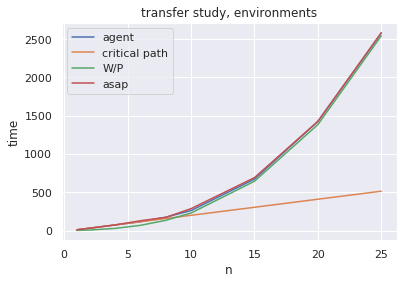

In [10]:
plt.title('transfer study, environments')
plt.plot(ns, times, label='agent')
plt.plot(ns, critical_path, label='critical path')
plt.plot(ns, total_work_normalized, label='W/P')
plt.plot(ns, times_asap, label="asap")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.savefig('/home/nathan/Documents/transfer_env_15_vs_ASAP.pdf')

In [10]:
ns

[1, 2, 4, 6, 8, 10, 15, 20, 25]

In [11]:
np.array(times)/np.array(times_asap)

array([1.        , 1.        , 1.        , 1.02586207, 1.05      ,
       1.03515625, 1.06137725, 1.02059659, 1.00895988])

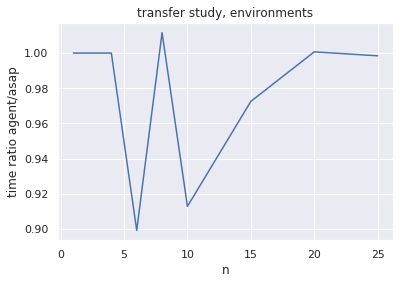

In [11]:
plt.title('transfer study, environments')
plt.plot(ns, np.array(times)/np.array(times_asap))
# plt.plot(ns, times_asap, label="asap")
plt.xlabel('n')
plt.ylabel('time ratio agent/asap')
# plt.legend()
plt.savefig('/home/nathan/Documents/transfer_env_15_vs_ASAP2.pdf')

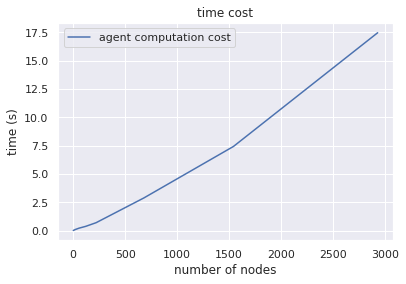

In [7]:
plt.title('time cost')
plt.plot(nb_nodes, temps_computation, label='agent computation cost')
plt.xlabel('number of nodes')
plt.ylabel('time (s)')
plt.legend()
plt.savefig('/home/nathan/Documents/transfer_env_8_time_cost.pdf')

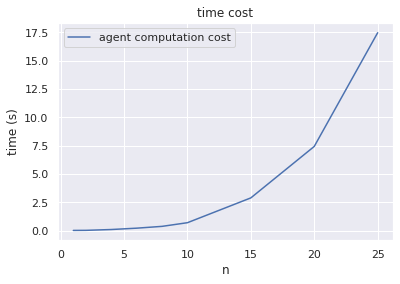

In [9]:
plt.title('time cost')
plt.plot(ns, temps_computation, label='agent computation cost')
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.savefig('/home/nathan/Documents/transfer_env_8_time_cost_n.pdf')

In [ ]:
# ns = list(range(1, 15))
# ps = list(range(1, 10))
temp = 40
n_sample = 20
rewards = []
times_40 = []
critical_path = []
total_work_normalized = []

for i in range(n_sample): 
    env = CholeskyTaskGraph(8, 4, 1)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False

    while not done:
        policy, value = model(observation)
        new_policy = policy ** temp / ((policy ** temp).sum())
        action_raw = torch.multinomial(F.relu(new_policy), 1).detach().cpu().numpy()[0]
#         action_raw = policy.argmax().detach().cpu().numpy()
        ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
        # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
        action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
        observation, reward, done, info = env.step(action)
    print(reward)
    print(env.time)
    rewards.append(reward)
    times_40.append(env.time)
    critical_path.append(env.critic_path_duration)
    total_work_normalized.append(env.total_work_normalized)

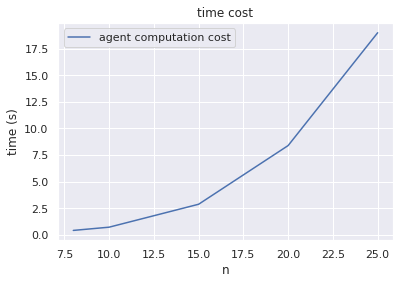

In [9]:
# ns = list(range(1, 15))
# ps = list(range(1, 10))
temp = 40
n_sample = 20
rewards = []
times_40 = []
critical_path = []
total_work_normalized = []

for i in range(n_sample): 
    env = CholeskyTaskGraph(8, 4, 1)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False

    while not done:
        policy, value = model(observation)
        new_policy = policy ** temp / ((policy ** temp).sum())
        action_raw = torch.multinomial(F.relu(new_policy), 1).detach().cpu().numpy()[0]
#         action_raw = policy.argmax().detach().cpu().numpy()
        ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
        # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
        action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
        observation, reward, done, info = env.step(action)
    print(reward)
    print(env.time)
    rewards.append(reward)
    times_40.append(env.time)
    critical_path.append(env.critic_path_duration)
    total_work_normalized.append(env.total_work_normalized)

In [3]:
# ns = list(range(1, 15))
# ps = list(range(1, 10))
temp = 40
n_sample = 20
rewards = []
times_40 = []
critical_path = []
total_work_normalized = []

for i in range(n_sample): 
    env = CholeskyTaskGraph(8, 4, 1)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False

    while not done:
        policy, value = model(observation)
        new_policy = policy ** temp / ((policy ** temp).sum())
        action_raw = torch.multinomial(F.relu(new_policy), 1).detach().cpu().numpy()[0]
#         action_raw = policy.argmax().detach().cpu().numpy()
        ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
        # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
        action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
        observation, reward, done, info = env.step(action)
    print(reward)
    print(env.time)
    rewards.append(reward)
    times_40.append(env.time)
    critical_path.append(env.critic_path_duration)
    total_work_normalized.append(env.total_work_normalized)

NameError: name 'CholeskyTaskGraph' is not defined

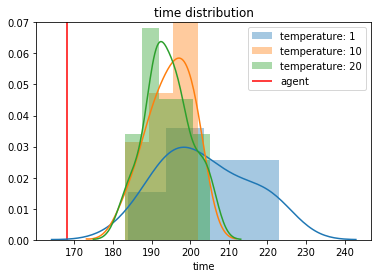

In [75]:
plt.title('time distribution')
sns.distplot(times_1, label='temperature: 1')
sns.distplot(times_10, label='temperature: 10')
sns.distplot(times_20, label='temperature: 20')
plt.vlines(168, 0, 0.07, label='agent', colors='r')
plt.ylim(0, 0.07)
plt.xlabel('time')
plt.legend()
plt.savefig('/home/nathan/Documents/time_distrib_agent_168.pdf')

In [4]:
dont_pass = []

for p in ps: 
    env = CholeskyTaskGraph(8, p, 1)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False
    
    while not done:
        action = env.ready_tasks[0]
        observation, reward, done, info = env.step(action)
    dont_pass.append(env.time)

121
121
121
121
121
121
121
121
121


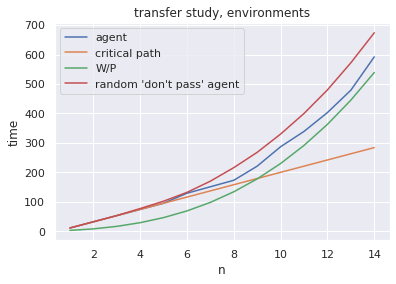

In [57]:
plt.title('transfer study, environments')
plt.plot(ns, times, label='agent')
plt.plot(ns, critical_path, label='critical path')
plt.plot(ns, total_work_normalized, label='W/P')
plt.plot(ns, dont_pass, label="random 'don't pass' agent")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.savefig('/home/nathan/Documents/transfer_env_8_w_1.pdf')

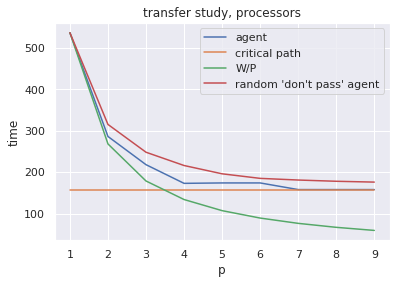

In [7]:
plt.title('transfer study, processors')
plt.plot(ps, times, label='agent')
plt.plot(ps, critical_path, label='critical path')
plt.plot(ps, total_work_normalized, label='W/P')
plt.plot(ps, dont_pass, label="random 'don't pass' agent")
plt.xlabel('p')
plt.ylabel('time')
plt.legend()
plt.savefig('/home/nathan/Documents/transfer_p_8_w_2.pdf')

In [30]:
import random
# random_times = []
random_times_dont_pass = []

for _ in range(50) : 
    env = CholeskyTaskGraph(8, 4, 1)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False

    while not done:
        policy, value = model(observation)
        # action_raw = random.randint(0, len(env.ready_tasks))
        action_raw = random.randint(0, len(env.ready_tasks)-1)
        if action_raw == len(env.ready_tasks):
            action = -1
        else:
            action = env.ready_tasks[action_raw]
        observation, reward, done, info = env.step(action)
    print(reward)
    print(env.time)
    random_times_dont_pass.append(env.time)

121
-0.34810126582278483
213.0
121
-0.17721518987341772
186.0
121
-0.27848101265822783
202.0
121
-0.31645569620253167
208.0
121
-0.26582278481012656
200.0
121
-0.31645569620253167
208.0
121
-0.22784810126582278
194.0
121
-0.25316455696202533
198.0
121
-0.26582278481012656
200.0
121
-0.2721518987341772
201.0
121
-0.21518987341772153
192.0
121
-0.14556962025316456
181.0
121
-0.17088607594936708
185.0
121
-0.25949367088607594
199.0
121
-0.189873417721519
188.0
121
-0.310126582278481
207.0
121
-0.20253164556962025
190.0
121
-0.22784810126582278
194.0
121
-0.15822784810126583
183.0
121
-0.25949367088607594
199.0
121
-0.22784810126582278
194.0
121
-0.2088607594936709
191.0
121
-0.189873417721519
188.0
121
-0.25316455696202533
198.0
121
-0.25949367088607594
199.0
121
-0.2721518987341772
201.0
121
-0.18354430379746836
187.0
121
-0.22784810126582278
194.0
121
-0.24050632911392406
196.0
121
-0.23417721518987342
195.0
121
-0.22784810126582278
194.0
121
-0.23417721518987342
195.0
121
-0.2594936708

/home/nathan/PycharmProjects/HPC/model.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(probs)


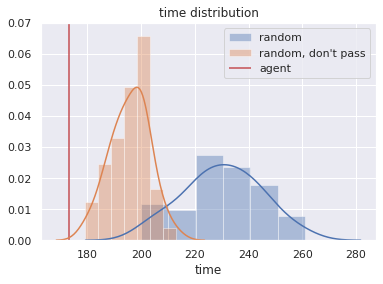

In [56]:
plt.title('time distribution')
sns.distplot(random_times, label='random')
sns.distplot(random_times_dont_pass, label="random, don't pass")
plt.vlines(times[7], 0, 0.07, label='agent', colors='r')
plt.ylim(0, 0.07)
plt.xlabel('time')
plt.legend()
plt.savefig('/home/nathan/Documents/time_distrib_8_4_1.pdf')

In [33]:
# ASAP in my case

env = CholeskyTaskGraph(8, 4, 1)
print(len(env.task_data.x))
observation = env.reset()
done = False

while not done:
    ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
    # policy, value = model(observation)
    policy = observation["graph"].x[ready_nodes][:, -1]
    # action_raw = torch.multinomial(policy, 1).detach().cpu().numpy()
    action_raw = policy.argmax().detach().cpu().numpy()
    # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
    action = observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
    observation, reward, done, info = env.step(action)
print(reward)
print(env.time)


121
-0.012658227848101266
160.0


In [15]:
def start_time(time, makespan):
    return makespan - time
    
def get_data(env):
    P = env.p
    Processed = env.processed
    processed = {}
    for k, v in Processed.items():
        processed[k] = [int(v[0]), int(env.time - v[1])] 
    Processed = processed
    
    #makespan should be dicrete and durations should be discretized
    makespan = Processed[(0,1,0,0)][1]
    current_times = [[makespan]*P]
    data = np.ones((P, makespan)) * (-1)
    data = data.astype(int)
    compl_data = [[] for _ in range(P)]
    #data = [[]*P]
    for x, sched in Processed.items():
        tasktype = x[0]
        pr = sched[0]
        s_time = start_time(sched[1], makespan)
        e_time = s_time + Task(x).durations[env.cluster.node_types[pr]] 
        data[pr, s_time:e_time] = tasktype
        #print('process', pr)
        if tasktype == 0:
            compl_data[pr].insert(0, (x[1]))
        elif tasktype == 1:
            compl_data[pr].insert(0, (x[1], x[2]))
        elif tasktype == 2:
            compl_data[pr].insert(0, (x[1], x[2]))
        else:
            compl_data[pr].insert(0, (x[1], x[2], x[3]))
        #print('here', len(compl_data[0]), len(compl_data[1]), len(compl_data[2]), len(compl_data[3]))

    return data, compl_data

def visualize_schedule(env, figsize = (80,30), fig_file = None, flip = True):
    data, compl_data = get_data(env)
    if flip:
        data = data[-1::-1, :]
        compl_data = compl_data[-1::-1]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_aspect(1)

    def avg(a, b):
        return (a + b) / 2.0

    for y, row in enumerate(data):
        #for x, col in enumerate(row):
        x = 0
        i = 0
        indices_in_row = compl_data[y]
        while x < len(row): 
            col = row[x]
            if col != -1:
                shift = Task([col]).durations[env.cluster.node_types[y]]
                indices = indices_in_row[i]
            else: 
                x = x + 1
                continue
            x1 = [x, x+shift]
            y1 = np.array([y, y])
            y2 = y1+1
            if col == 0:
                plt.fill_between(x1, y1, y2 = y2, facecolor= 'green', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), 'C({})'.format(indices), 
                                            horizontalalignment = 'center',
                                            verticalalignment = 'center', fontsize=30)

            if col == 1:
                plt.fill_between(x1, y1, y2=y2, facecolor='red', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "S{}".format(indices), 
                                            horizontalalignment='center',
                                            verticalalignment='center', fontsize=30)
            if col == 2:
                plt.fill_between(x1, y1, y2=y2, facecolor='orange', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "T{}".format(indices), 
                                            horizontalalignment='center',
                                            verticalalignment='center', fontsize=30)
            if col == 3:
                plt.fill_between(x1, y1, y2=y2, facecolor='yellow', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "G{}".format(indices), 
                                            horizontalalignment='center',
                                            verticalalignment='center', fontsize=30)
            x = x + shift
            i = i + 1

    plt.ylim(P, 0)
    plt.xlim(-1e-3, data.shape[1] + 1e-3)
    plt.xticks(fontsize=50)
    if fig_file != None:
        plt.savefig(fig_file)
    return

In [18]:
visualize_schedule(env.processed, figsize=(200, 100),fig_file = '/home/nathan/PycharmProjects/HPC/img/sched_train_n=4_test_n=8.pdf')

AttributeError: 'dict' object has no attribute 'p'

In [14]:
env.processed

{(0, 1, 0, 0): [0, 0],
 (2, 1, 8, 0): [0, 1.0],
 (2, 1, 7, 0): [1, 1.0],
 (2, 1, 6, 0): [2, 1.0],
 (2, 1, 5, 0): [3, 1.0],
 (1, 7, 1, 0): [0, 4.0],
 (1, 8, 1, 0): [1, 4.0],
 (3, 7, 8, 1): [0, 7.0],
 (2, 1, 4, 0): [1, 7.0],
 (1, 5, 1, 0): [2, 9.0],
 (1, 6, 1, 0): [3, 9.0],
 (1, 4, 1, 0): [1, 10.0],
 (3, 4, 5, 1): [2, 11.0],
 (3, 5, 6, 1): [3, 11.0],
 (3, 4, 6, 1): [0, 13.0],
 (3, 6, 7, 1): [1, 13.0],
 (3, 5, 7, 1): [2, 14.0],
 (3, 4, 7, 1): [3, 14.0],
 (3, 6, 8, 1): [2, 17.0],
 (3, 5, 8, 1): [3, 17.0],
 (3, 4, 8, 1): [0, 19.0],
 (2, 1, 3, 0): [1, 19.0],
 (2, 1, 2, 0): [2, 20.0],
 (1, 3, 1, 0): [1, 22.0],
 (3, 3, 4, 1): [3, 22.0],
 (3, 3, 5, 1): [0, 25.0],
 (3, 3, 6, 1): [1, 25.0],
 (3, 3, 7, 1): [3, 25.0],
 (1, 2, 1, 0): [2, 28.0],
 (3, 2, 3, 1): [3, 28.0],
 (0, 2, 0, 0): [2, 30.0],
 (3, 2, 4, 1): [0, 31.0],
 (3, 2, 5, 1): [1, 31.0],
 (3, 2, 6, 1): [3, 31.0],
 (3, 2, 7, 1): [3, 34.0],
 (3, 3, 8, 1): [0, 37.0],
 (3, 2, 8, 1): [1, 37.0],
 (2, 2, 3, 0): [2, 41.0],
 (2, 2, 4, 0): [3, 41.0],

In [6]:
env = CholeskyTaskGraph(8, np.array([0, 0, 1, 1]), 1)
print(len(env.task_data.x))
observation = env.reset()
done = False

while not done:
    policy, value = model(observation)
#     new_policy = policy ** temp / ((policy ** temp).sum())
#     action_raw = torch.multinomial(F.relu(new_policy), 1).detach().cpu().numpy()[0]
    action_raw = policy.argmax().detach().cpu().numpy()
    ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
#     action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
    action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
    observation, reward, done, info = env.step(action)

121


/home/nathan/PycharmProjects/HPC/model.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(probs)


In [11]:
env.processed

{(0, 1, 0, 0): [0, 0],
 (2, 1, 8, 0): [0, 1.0],
 (2, 1, 7, 0): [1, 1.0],
 (2, 1, 6, 0): [2, 1.0],
 (2, 1, 5, 0): [3, 1.0],
 (1, 7, 1, 0): [0, 4.0],
 (1, 8, 1, 0): [1, 4.0],
 (3, 7, 8, 1): [0, 7.0],
 (2, 1, 4, 0): [1, 7.0],
 (1, 5, 1, 0): [2, 9.0],
 (1, 6, 1, 0): [3, 9.0],
 (1, 4, 1, 0): [1, 10.0],
 (3, 4, 5, 1): [2, 11.0],
 (3, 5, 6, 1): [3, 11.0],
 (3, 4, 6, 1): [0, 13.0],
 (3, 6, 7, 1): [1, 13.0],
 (3, 5, 7, 1): [2, 14.0],
 (3, 4, 7, 1): [3, 14.0],
 (3, 6, 8, 1): [2, 17.0],
 (3, 5, 8, 1): [3, 17.0],
 (3, 4, 8, 1): [0, 19.0],
 (2, 1, 3, 0): [1, 19.0],
 (2, 1, 2, 0): [2, 20.0],
 (1, 3, 1, 0): [1, 22.0],
 (3, 3, 4, 1): [3, 22.0],
 (3, 3, 5, 1): [0, 25.0],
 (3, 3, 6, 1): [1, 25.0],
 (3, 3, 7, 1): [3, 25.0],
 (1, 2, 1, 0): [2, 28.0],
 (3, 2, 3, 1): [3, 28.0],
 (0, 2, 0, 0): [2, 30.0],
 (3, 2, 4, 1): [0, 31.0],
 (3, 2, 5, 1): [1, 31.0],
 (3, 2, 6, 1): [3, 31.0],
 (3, 2, 7, 1): [3, 34.0],
 (3, 3, 8, 1): [0, 37.0],
 (3, 2, 8, 1): [1, 37.0],
 (2, 2, 3, 0): [2, 41.0],
 (2, 2, 4, 0): [3, 41.0],

IndexError: list index out of range

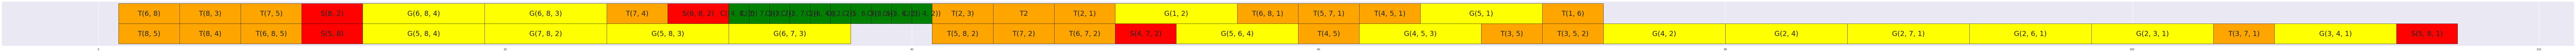

In [16]:
visualize_schedule(env, figsize=(200, 100),fig_file = '/home/nathan/PycharmProjects/HPC/img/test.pdf')

In [16]:
env

In [ ]:
env.prov

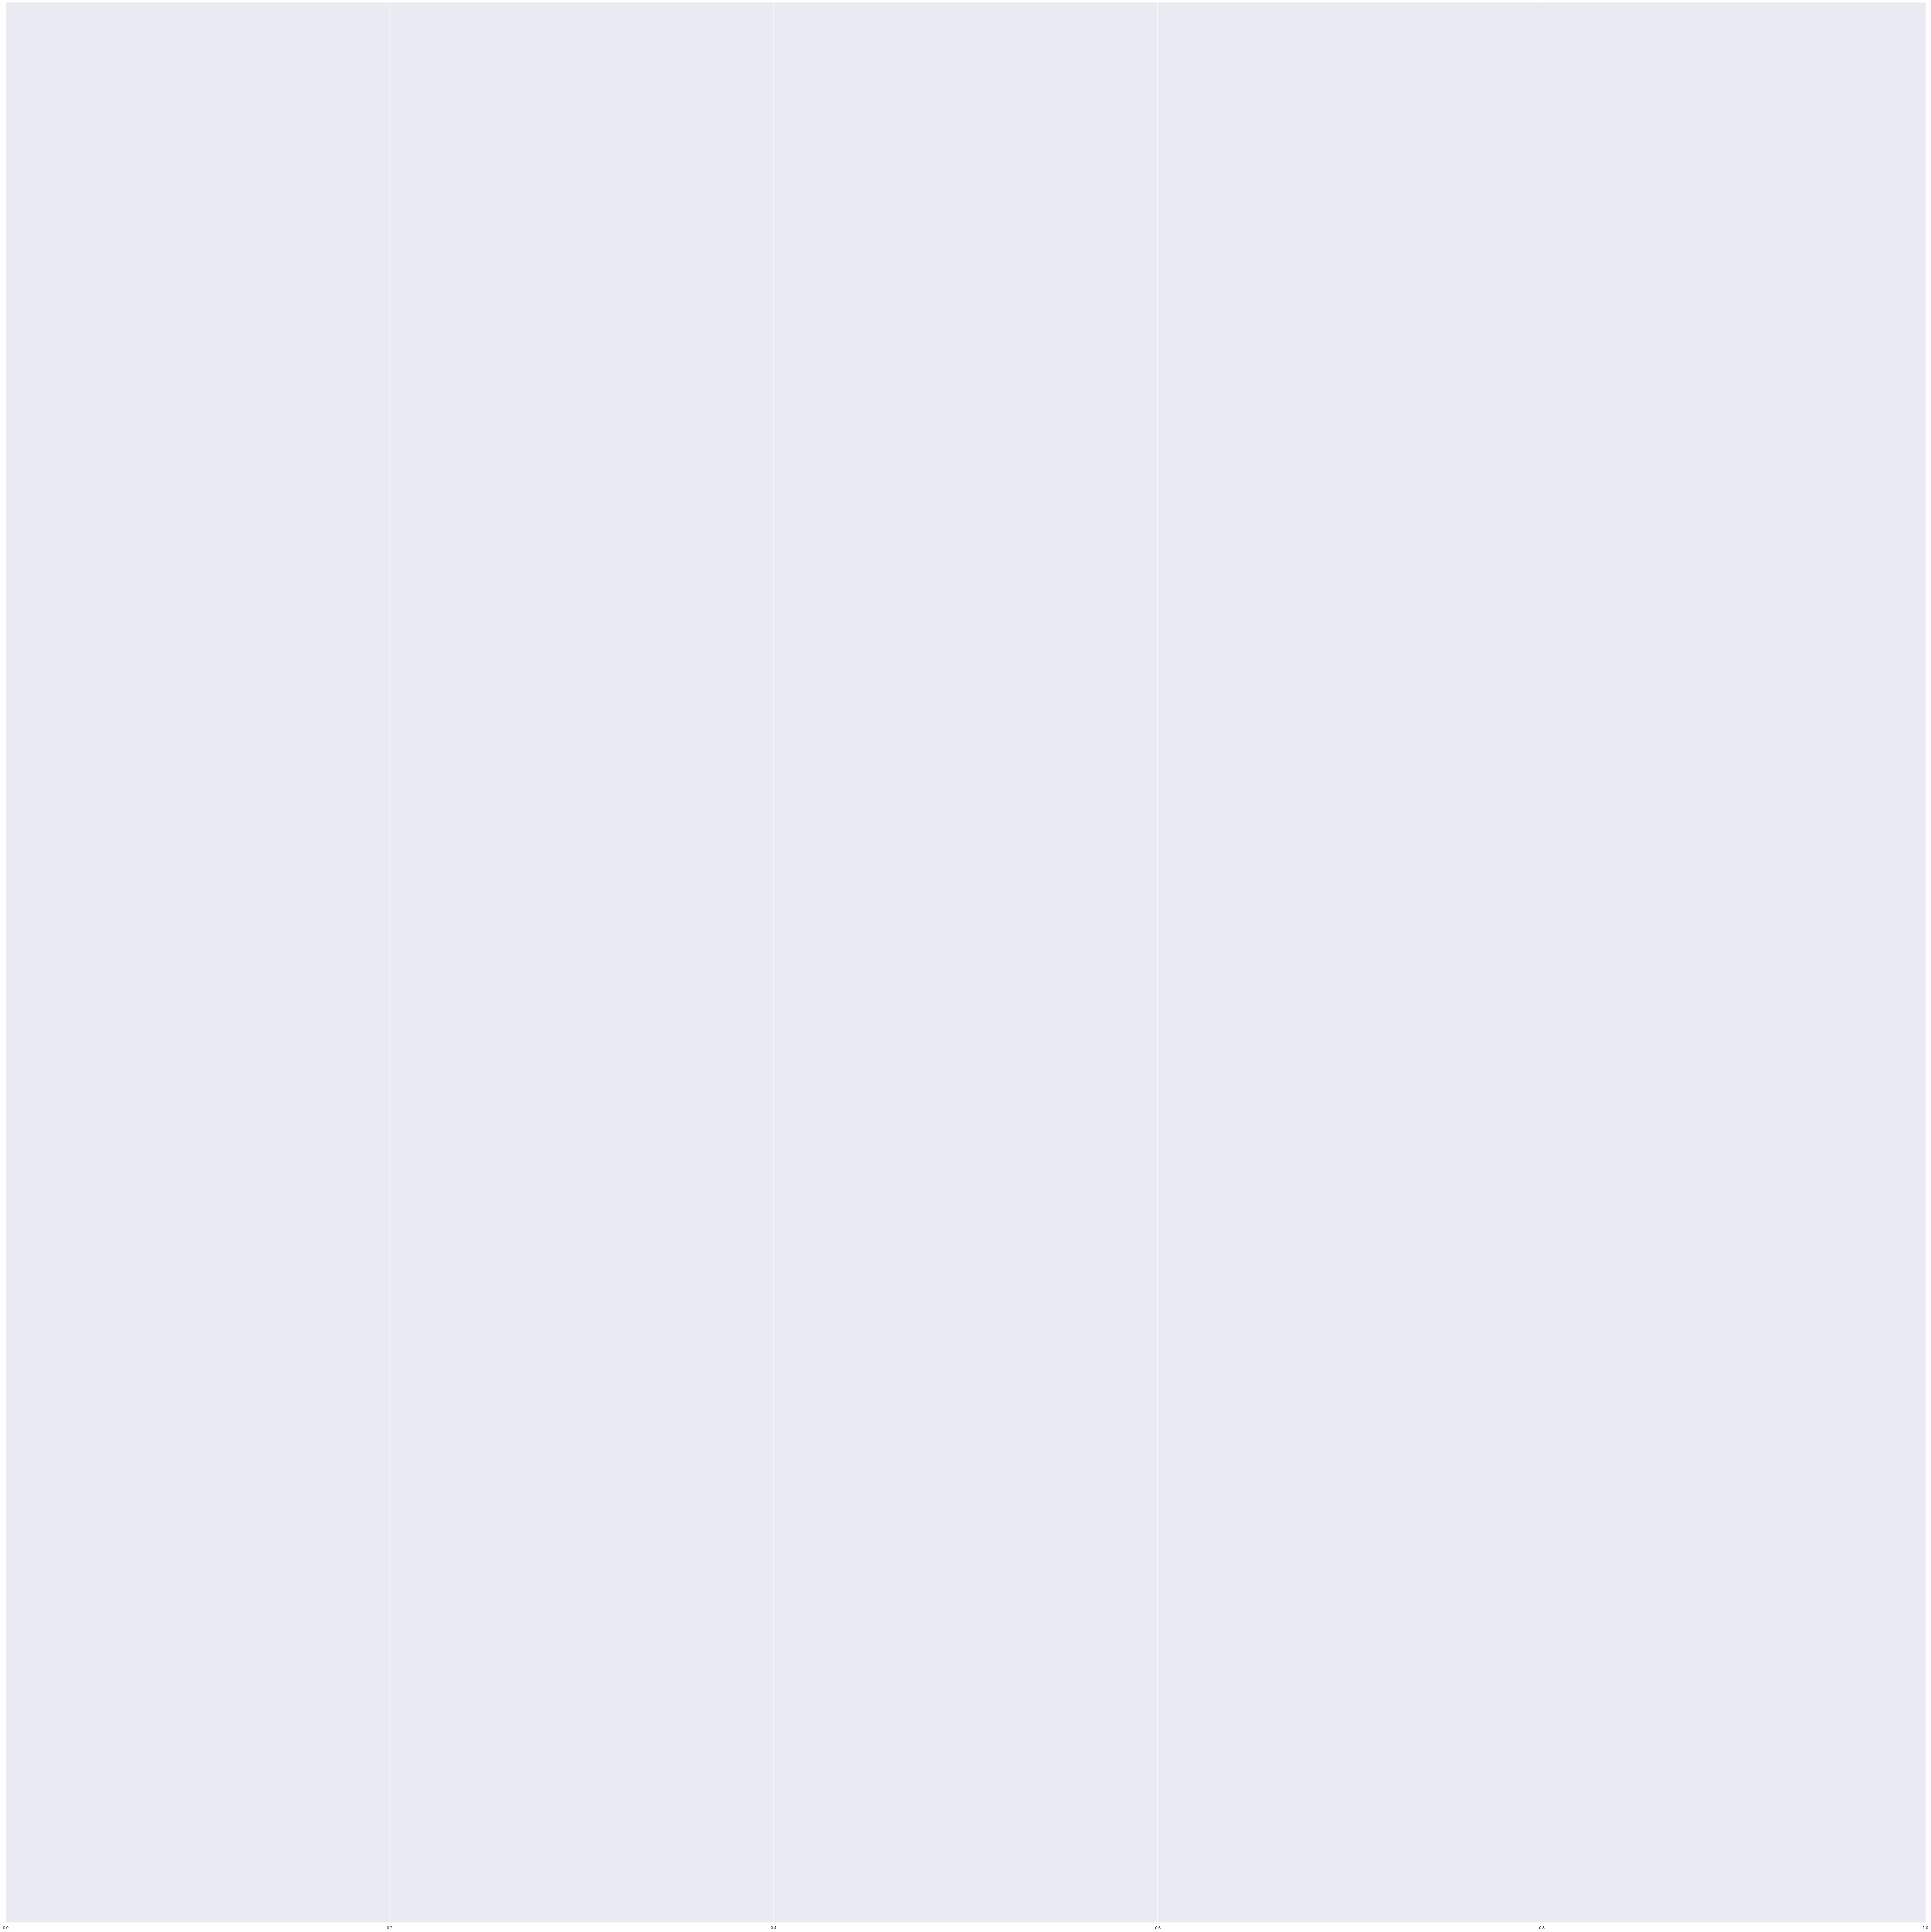

In [19]:
data, compl_data = get_data(env)
if True:
    data = data[-1::-1, :]
    compl_data = compl_data[-1::-1]

fig = plt.figure(figsize=(200, 100))
ax = fig.add_subplot(111)
ax.axes.get_yaxis().set_visible(False)
ax.set_aspect(1)

def avg(a, b):
    return (a + b) / 2.0

In [24]:
print(data.shape)
print(len(compl_data))

(4, 133)
4


In [31]:
print(len(compl_data[0]))


29


In [ ]:
for y, row in enumerate(data):
    #for x, col in enumerate(row):
    x = 0
    i = 0
    indices_in_row = compl_data[y]
    while x < len(row): 
        col = row[x]
        if col != -1:
            shift = Task([col]).durations[env.cluster.node_types[y]]
            indices = indices_in_row[i]
        else: 
            x = x + 1
            continue
        x1 = [x, x+shift]
        y1 = np.array([y, y])
        y2 = y1+1
        if col == 0:
            plt.fill_between(x1, y1, y2 = y2, facecolor= 'green', edgecolor = 'Black')
            plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), 'C({})'.format(indices), 
                                        horizontalalignment = 'center',
                                        verticalalignment = 'center', fontsize=30)

        if col == 1:
            plt.fill_between(x1, y1, y2=y2, facecolor='red', edgecolor = 'Black')
            plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "S{}".format(indices), 
                                        horizontalalignment='center',
                                        verticalalignment='center', fontsize=30)
        if col == 2:
            plt.fill_between(x1, y1, y2=y2, facecolor='orange', edgecolor = 'Black')
            plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "T{}".format(indices), 
                                        horizontalalignment='center',
                                        verticalalignment='center', fontsize=30)
        if col == 3:
            plt.fill_between(x1, y1, y2=y2, facecolor='yellow', edgecolor = 'Black')
            plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "G{}".format(indices), 
                                        horizontalalignment='center',
                                        verticalalignment='center', fontsize=30)
        x = x + shift
        i = i + 1

plt.ylim(P, 0)
plt.xlim(-1e-3, data.shape[1] + 1e-3)
plt.xticks(fontsize=50)
if fig_file != None:
    plt.savefig(fig_file)
return